In [2]:
# importação de arquivo
import pandas as pd
import numpy as np
# visualização de gráficos
import seaborn as sns
# visualização de gráficos
import matplotlib.pyplot as plt
# visualizar grafico dinâmico 
import plotly.express as px
# GaussianNB - Nome de uma distirbuição estatistica (usado para problemas genericos
from sklearn.tree import DecisionTreeClassifier
import pickle

In [3]:
with open('./../base/census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_test, y_census_test = pickle.load(f)

In [4]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [5]:
X_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [6]:
tree_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
predict = tree_census.predict(X_census_test)
predict

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [9]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_test, predict)

0.8104401228249745

0.8104401228249745

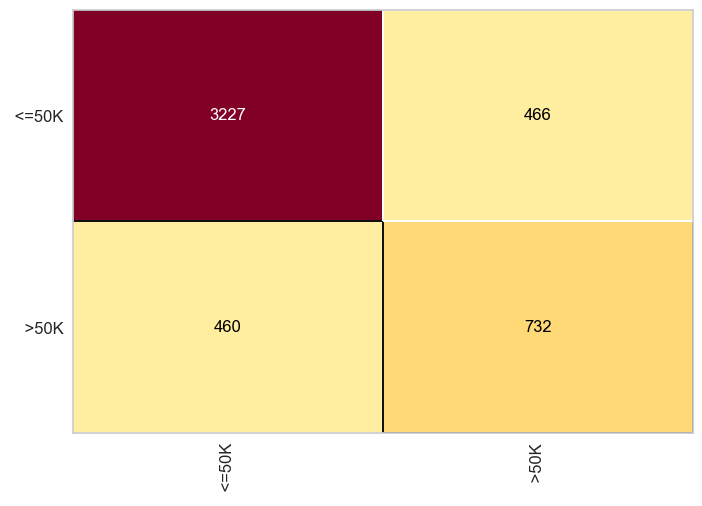

In [11]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(tree_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_test, y_census_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_census_test, predict))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [23]:
previsoes = random_forest_census.predict(X_census_test) 
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [24]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [26]:
accuracy_score(y_census_test, previsoes)

0.8507676560900717

0.8507676560900717

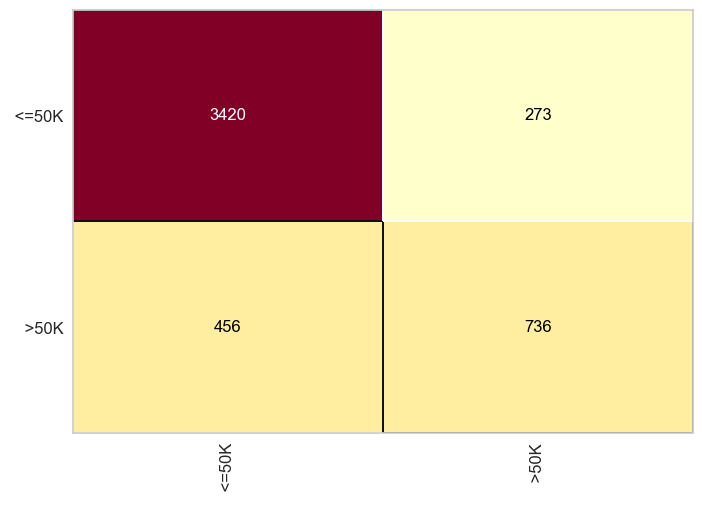

In [27]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_test, y_census_test)

In [28]:
print(classification_report(y_census_test,previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

